<a href="https://colab.research.google.com/github/Nithi-121/Customer-Churn-Analysis-and-Prediction/blob/main/Customer_Churn_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1 — Data Preparation (Load, clean, encode)**




In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 1.1 Load dataset
df = pd.read_csv('/content/Telco_Customer_Churn_Dataset  (1).csv')

In [ ]:
# 1.2 Quick overview
print(df.shape)
print(df.info())
print(df.head())

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

In [ ]:
# 1.3 Handle missing values: show counts first
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# 1.4 Example handling: for numeric columns use median, categorical use mode
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

for c in num_cols:
    if df[c].isnull().any():
        df[c].fillna(df[c].median(), inplace=True)

for c in cat_cols:
    if df[c].isnull().any():
        df[c].fillna(df[c].mode()[0], inplace=True)

In [ ]:
# 1.5 Convert target to binary if necessary
if df['Churn'].dtype == 'object':
     df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [ ]:
# 1.6 Encode categorical variables: use one-hot for nominal, ordinal as needed
df = pd.get_dummies(df, columns=[c for c in cat_cols if c != 'Churn'], drop_first=True)

In [ ]:
# 1.7 Final check
print('After preprocessing shape:', df.shape)
print(df.head())


After preprocessing shape: (7043, 13602)
   SeniorCitizen  tenure  MonthlyCharges  Churn  customerID_0003-MKNFE  \
0              0       1           29.85      0                  False   
1              0      34           56.95      0                  False   
2              0       2           53.85      1                  False   
3              0      45           42.30      0                  False   
4              0       2           70.70      1                  False   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-MHZWF  customerID_0013-SMEOE  ...  TotalCharges_99

**Task 2 — Split Data for Training and Testing (80/20)**

In [ ]:
# Task 2: Split Data for Training and Testing
from sklearn.model_selection import train_test_split

In [ ]:
# 2.1 Separate features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

In [ ]:
# 2.2 Stratified split to preserve class ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [ ]:
# 2.3 Confirm split sizes and class distribution
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)
print('Train churn ratio:\n', y_train.value_counts(normalize=True))
print('Test churn ratio:\n', y_test.value_counts(normalize=True))


Train shape: (5634, 13601) Test shape: (1409, 13601)
Train churn ratio:
 Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Test churn ratio:
 Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


**Task 3 — Feature Selection (filter + wrapper examples)**

In [ ]:
# Task 3: Feature Selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif
import matplotlib.pyplot as plt

In [ ]:
# 3.1 Option A: Univariate selection (for non-negative features)
# If chi2 requires non-negative, ensure features >=0; here use f_classif for general numeric
selector = SelectKBest(score_func=f_classif, k=20)  # choose top 20 features as example
selector.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [    4     7    10 ... 13590 13591 13595] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectKBest(k=20)

In [ ]:
# 3.2 Get selected feature names
selected_mask = selector.get_support()
selected_features = X_train.columns[selected_mask].tolist()
print('Top features (SelectKBest):', selected_features)

Top features (SelectKBest): ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Partner_Yes', 'Dependents_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check']


In [ ]:
# 3.3 Option B: Remove highly correlated features
corr = X_train.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
print('Highly correlated to drop:', to_drop)

Highly correlated to drop: ['MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'TotalCharges_100.2', 'TotalCharges_100.25', 'TotalCharges_100.35', 'TotalCharges_100.4', 'TotalCharges_100.8', 'TotalCharges_100.9', 'TotalCharges_1001.2', 'TotalCharges_1001.5', 'TotalCharges_1003.05', 'TotalCharges_1004.5', 'TotalCharges_1004.75', 'TotalCharges_1005.7', 'TotalCharges_1006.9', 'TotalCharges_1007.8', 'TotalCharges_1007.9', 'TotalCharges_1008.55', 'TotalCharges_1008.7', 'TotalCharges_1009.25', 'TotalCharges_101.45', 'TotalCharges_101.65', 'TotalCharges_101.9', 'TotalCharges_1010', 'TotalCharges_1011.5', 'TotalCharges_1011.8', 'TotalCharges_1012.4', 'TotalCharges_1013.05', 'TotalCharges_1013.35', 'TotalCharges_1013.6', 'TotalCharges_1014.25', 'TotalCharges_1016.7', 'TotalCharges_1017.35', '

In [ ]:
 # 3.4 Create reduced dataset using selected features (example uses intersection)
features_final = [f for f in selected_features if f not in to_drop]
X_train_sel = X_train[features_final]
X_test_sel = X_test[features_final]
print('Final feature count:', len(features_final))


Final feature count: 14


**Task 4 — Model Selection (compare several classifiers)**

In [ ]:
# Task 4: Model Selection (instantiate candidate models)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# 4.1 Create model instances
models = {
      'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
      'DecisionTree': DecisionTreeClassifier(random_state=42),
     'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
     'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
 }

In [ ]:
# 4.2 Quick cross-validation to compare (use F1 or ROC-AUC)
for name, model in models.items():
     scores = cross_val_score(model, X_train_sel, y_train, cv=5, scoring='f1')
     print(f'{name}: Mean F1 = {scores.mean():.4f} (+/- {scores.std():.4f})')

LogisticRegression: Mean F1 = 0.5813 (+/- 0.0193)
DecisionTree: Mean F1 = 0.5106 (+/- 0.0239)
RandomForest: Mean F1 = 0.5401 (+/- 0.0232)
GradientBoosting: Mean F1 = 0.5717 (+/- 0.0298)


In [ ]:
# 4.3 Choose a model based on CV results (example: choose RandomForest)
chosen_model = RandomForestClassifier(n_estimators=200, random_state=42)


**Task 5 — Model Training**

In [ ]:
# Task 5: Model Training
# 5.1 Fit chosen model on selected features
chosen_model.fit(X_train_sel, y_train)

# 5.2 Save trained model optionally
import joblib
joblib.dump(chosen_model, 'churn_random_forest.pkl')
print('Model trained and saved to churn_random_forest.pkl')


Model trained and saved to churn_random_forest.pkl


**Task 6 — Model Evaluation (accuracy, precision, recall, F1, ROC-AUC)**

In [ ]:
# Task 6: Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

In [ ]:
# 6.1 Predict on test set
y_pred = chosen_model.predict(X_test_sel)
y_proba = chosen_model.predict_proba(X_test_sel)[:,1]  # probability for ROC-AUC

In [ ]:
# 6.2 Compute standard metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1-score:', f1)
print('ROC-AUC:', roc)

Accuracy: 0.7806955287437899
Precision: 0.6065573770491803
Recall: 0.4946524064171123
F1-score: 0.5449189985272459
ROC-AUC: 0.8168746286393346


In [ ]:
# 6.3 Confusion matrix and classification report
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Confusion Matrix:
 [[915 120]
 [189 185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1035
           1       0.61      0.49      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



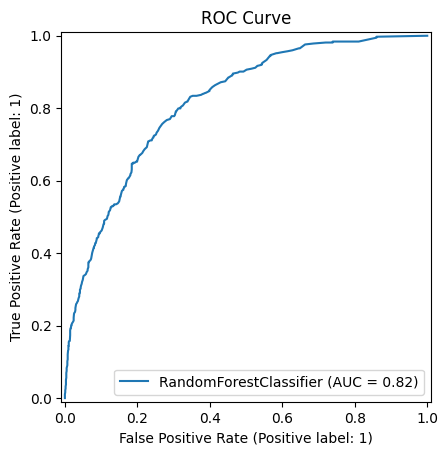

In [ ]:
# 6.4 Plot ROC curve (single plot)
RocCurveDisplay.from_estimator(chosen_model, X_test_sel, y_test)
plt.title('ROC Curve')
plt.show()
